In [115]:
import networkx as nx
import plotly
import plotly.graph_objects as go
import json

In [116]:
with open("data/events.json") as f:
    data = json.load(f)

In [117]:
G = nx.Graph()

In [127]:
pos = {}
edges = []
i=0

for d in data:
    if "tag" not in d.keys() or d["tag"] is None:
        px = 0
        tag = "real"
    else:
        px = 1
        tag = "fake"
    
    #pos[d["id"]]=(px, d["date"])
    date = int(d["date"])
    if date<-10000:
        i=i+1
        date = -10000+i
        
    G.add_node(d["id"], pos=(int(date),px), event=d["event"], tag=tag)

    previous_ids = d["previous_ids"]
    for p in previous_ids:
        G.add_edge(p,d["id"])
    next_ids = d["next_ids"]
    for p in next_ids:
        G.add_edge(d["id"],p)

In [128]:
for i in range(len(G.nodes())):
    print(G.nodes[i])

{'pos': (-9999, 0), 'event': 'The Big Bang', 'tag': 'real'}
{'pos': (1989, 0), 'event': 'Invention of Internet', 'tag': 'real'}
{'pos': (0, 0), 'event': 'Jesus is born', 'tag': 'real'}
{'pos': (-69, 0), 'event': 'Cesar is murdered', 'tag': 'real'}
{'pos': (-3000, 0), 'event': 'Humans invented the wheel', 'tag': 'real'}
{'pos': (-2000, 0), 'event': 'Humanity is created', 'tag': 'real'}
{'pos': (-9998, 0), 'event': 'Dinosaurs appear on the planet', 'tag': 'real'}
{'pos': (1889, 0), 'event': 'Hitler is born ', 'tag': 'real'}
{'pos': (0, 0), 'event': 'Jesus is born', 'tag': 'real'}
{'pos': (1509, 0), 'event': 'Magellan', 'tag': 'real'}
{'pos': (-1, 0), 'event': 'Joseph fucks Marie ', 'tag': 'real'}
{'pos': (1492, 0), 'event': 'Christoph Colomb discovers America', 'tag': 'real'}
{'pos': (-1327, 0), 'event': 'Toutânkhamon is dead', 'tag': 'real'}
{'pos': (-530, 0), 'event': "Pythagore's Theorem", 'tag': 'real'}
{'pos': (1431, 0), 'event': "Jeanne d'Arc dies on a pyre", 'tag': 'real'}
{'pos':

In [129]:
for edge in G.edges():
    if "pos" in G.nodes[edge[0]].keys():
        x0, y0 = G.nodes[edge[0]]['pos']
        print(x0,y0)

1989 0
1431 0
0 0
-530 0
-69 0


In [130]:
G.nodes

NodeView((1, 14, 2, 13, 3, 16, 4, 5, 7, 8, 9, 10, 11, 12, 6, 15, 0))

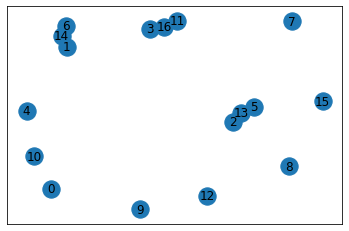

In [131]:
nx.draw_networkx(G)

In [135]:
def get_color(tag):
    if tag is None:
        return "green"
    elif tag=="fake":
        return "red"
    return "green"

In [138]:
edge_x = []
edge_y = []
for edge in G.edges():
    if "pos" in G.nodes[edge[0]].keys() and "pos" in G.nodes[edge[1]].keys():
        x0, y0 = G.nodes[edge[0]]['pos']
        x1, y1 = G.nodes[edge[1]]['pos']
        edge_x.append(x0)
        edge_x.append(x1)
        edge_y.append(y0)
        edge_y.append(y1)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
events = []
colors = []
for node in G.nodes():
    if "pos" in G.nodes[node].keys():
        n = G.nodes[node]
        x, y = n['pos']
        events.append(n["event"])
        colors.append(get_color(n["tag"]))
        node_x.append(x)
        node_y.append(y)

        
print(node_x)
print(events)
print(node_y)
node_trace = go.Scatter(
    x=node_x, y=node_y, text=events,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        color=colors,
        size=10,
        line_width=2)
)
fig = go.Figure(data=[node_trace])
fig.show()

[1989, 1431, 0, -530, -69, -3000, -2000, 1889, 0, 1509, -1, 1492, -1327, -9998, -1320, -9999]
['Invention of Internet', "Jeanne d'Arc dies on a pyre", 'Jesus is born', "Pythagore's Theorem", 'Cesar is murdered', 'Humans invented the wheel', 'Humanity is created', 'Hitler is born ', 'Jesus is born', 'Magellan', 'Joseph fucks Marie ', 'Christoph Colomb discovers America', 'Toutânkhamon is dead', 'Dinosaurs appear on the planet', 'Toutânkhamon has 3 children', 'The Big Bang']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
